In [0]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt

#   Generate universe variables
#   Temprature and Activity Level on range of [0, 100]
#   Hit has a range of [0, 12]

Temperature = np.arange(0, 101, 1)
Activity_Level = np.arange(0, 101, 1)
Heater  = np.arange(0, 13, 1)

#   Generate fuzzy membership functions

#   Temprature
Temp_Freezing = fuzz.trimf(Temperature, [0, 0, 25])
Temp_Cold = fuzz.trimf(Temperature, [0, 25, 50])
Temp_Cool = fuzz.trimf(Temperature, [25, 50, 75])
Temp_Warm = fuzz.trimf(Temperature, [50, 75, 100])
Temp_Hot = fuzz.trimf(Temperature, [75, 100, 100])

#   Activity
Activity_Quiet = fuzz.trimf(Activity_Level, [0, 0, 50])
Activity_Medium = fuzz.trimf(Activity_Level, [0, 50, 100])
Activity_Busy = fuzz.trimf(Activity_Level, [50, 100, 100])

#   Heater
Heater_Off = fuzz.trimf(Heater, [0, 0, 4])
Heater_Low = fuzz.trimf(Heater, [0, 4, 8])
Heater_Medium = fuzz.trimf(Heater, [4, 8, 12])
Heater_High = fuzz.trimf(Heater, [8, 12, 12])

In [0]:
#   Temprature Input : 35
Temp_Level_Freezing = fuzz.interp_membership(Temperature, Temp_Freezing, 35)
Temp_Level_Cold = fuzz.interp_membership(Temperature, Temp_Cold, 35)
Temp_Level_Cool = fuzz.interp_membership(Temperature, Temp_Cool, 35)
Temp_Level_Warm = fuzz.interp_membership(Temperature, Temp_Warm, 35)
Temp_Level_Hot = fuzz.interp_membership(Temperature, Temp_Hot, 35)

#   Activity Level : 61
Activity_Level_Quiet = fuzz.interp_membership(Activity_Level, Activity_Quiet, 61)
Activity_Level_Medium = fuzz.interp_membership(Activity_Level, Activity_Medium, 61)
Activity_Level_Busy = fuzz.interp_membership(Activity_Level, Activity_Busy, 61)

#   define Rules 

#   Rule 1
active_rule1 = np.fmax(Temp_Level_Freezing, Activity_Level_Quiet)
Heater_activation_off = np.fmin(active_rule1, Heater_Off)  

#   Rule 2
active_rule2 = np.fmax(Temp_Level_Cool, Activity_Level_Medium)
Heater_activation_low = np.fmin(active_rule2, Heater_Low)

#   Rule 3
active_rule3 = np.fmax(Temp_Level_Warm, Activity_Level_Busy)
Heater_activation_md = np.fmin(active_rule3, Heater_Medium)

#   Rule 4
active_rule4 = np.fmax(Temp_Level_Hot, Activity_Level_Busy)
Heater_activation_hi = np.fmin(active_rule4, Heater_High)


Heater0 = np.zeros_like(Heater)

In [53]:
#   Aggregate all 4 output membership functions together
aggregated = np.fmax(Heater_activation_off,
                     np.fmax(Heater_activation_low,
                     np.fmax(Heater_activation_md , Heater_activation_hi)))

#   Calculate defuzzified result
XHeater = fuzz.defuzz(Heater, aggregated, 'centroid')
Heater_activation = fuzz.interp_membership(Heater, aggregated, XHeater)  # for plot

print("\n \n \t \t --> \t Temperature is : 35\t  <-- \n \t\t -->\tActivity Level is : 61    <-- \n\t\t --> Heater is: " + str(XHeater) + " <--"+ "\n\n")


 
 	 	 --> 	 Temperature is : 35	  <-- 
 		 -->	Activity Level is : 61    <-- 
		 --> Heater is: 5.191474493361286 <--




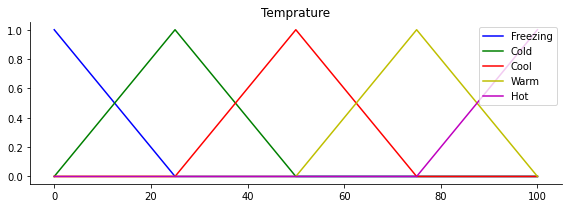

In [30]:
#   Visualize these universes and membership functions
fig, ax0 = plt.subplots(figsize=(8, 3))

#   Temprature Visualize
ax0.plot(Temperature, Temp_Freezing, 'b', linewidth=1.5, label='Freezing')
ax0.plot(Temperature, Temp_Cold, 'g', linewidth=1.5, label='Cold')
ax0.plot(Temperature, Temp_Cool, 'r', linewidth=1.5, label='Cool')
ax0.plot(Temperature, Temp_Warm, 'y', linewidth=1.5, label='Warm')
ax0.plot(Temperature, Temp_Hot, 'm', linewidth=1.5, label='Hot')
ax0.set_title('Temprature')
ax0.legend()

for ax in (ax0,):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()
plt.tight_layout()

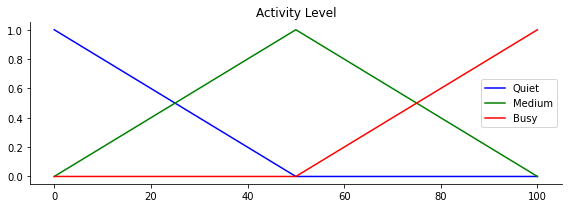

In [31]:
#   Activity Level Visualize
fig, ax1 = plt.subplots(figsize=(8, 3))
ax1.plot(Activity_Level, Activity_Quiet, 'b', linewidth=1.5, label='Quiet')
ax1.plot(Activity_Level, Activity_Medium, 'g', linewidth=1.5, label='Medium')
ax1.plot(Activity_Level, Activity_Busy, 'r', linewidth=1.5, label='Busy')
ax1.set_title('Activity Level')
ax1.legend()

for ax in (ax1,):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()
plt.tight_layout()

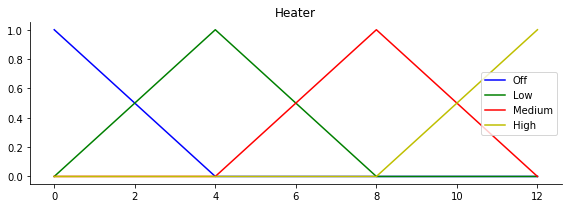

In [32]:
#   Heater Visualize
fig, ax2 = plt.subplots(figsize=(8, 3))
ax2.plot(Heater, Heater_Off, 'b', linewidth=1.5, label='Off')
ax2.plot(Heater, Heater_Low, 'g', linewidth=1.5, label='Low')
ax2.plot(Heater, Heater_Medium, 'r', linewidth=1.5, label='Medium')
ax2.plot(Heater, Heater_High, 'y', linewidth=1.5, label='High')
ax2.set_title('Heater')
ax2.legend()

for ax in (ax2,):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()
plt.tight_layout()

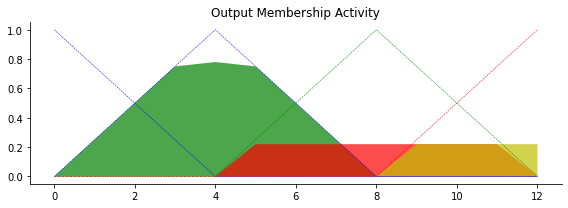

In [34]:
#   Visualize Membership Activity
fig, ax0 = plt.subplots(figsize=(8, 3))

ax0.fill_between(Heater, Heater0, Heater_activation_off, facecolor='b', alpha=0.7)
ax0.plot(Heater, Heater_Off, 'b', linewidth=0.5, linestyle='--', )

ax0.fill_between(Heater, Heater0, Heater_activation_low, facecolor='g', alpha=0.7)
ax0.plot(Heater, Heater_Low, 'b', linewidth=0.5, linestyle='--', )

ax0.fill_between(Heater, Heater0, Heater_activation_md, facecolor='r', alpha=0.7)
ax0.plot(Heater, Heater_Medium, 'g', linewidth=0.5, linestyle='--')

ax0.fill_between(Heater, Heater0, Heater_activation_hi, facecolor='y', alpha=0.7)
ax0.plot(Heater, Heater_High, 'r', linewidth=0.5, linestyle='--')

ax0.set_title('Output Membership Activity')

#   Turn off top/right axes
for ax in (ax0,):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()

plt.tight_layout()

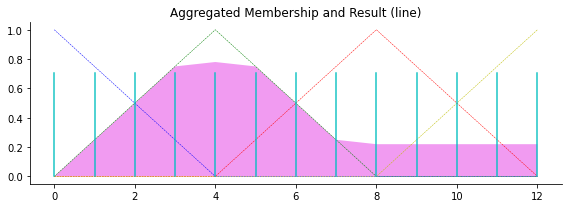

In [38]:
#Visualize Aggregated Membership and Result
fig, ax0 = plt.subplots(figsize=(8, 3))

ax0.plot(Heater, Heater_Off, 'b', linewidth=0.5, linestyle='--', )
ax0.plot(Heater, Heater_Low, 'g', linewidth=0.5, linestyle='--', )
ax0.plot(Heater, Heater_Medium, 'r', linewidth=0.5, linestyle='--')
ax0.plot(Heater, Heater_High, 'y', linewidth=0.5, linestyle='--')
ax0.fill_between(Heater, Heater0, aggregated, facecolor='Violet', alpha=0.8)
ax0.plot([Heater, Heater], [0, Heater_activation], 'c', linewidth=1.5, alpha=0.9)
ax0.set_title('Aggregated Membership and Result (line)')

#   Turn off top/right axes
for ax in (ax0,):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()

plt.tight_layout()